# Introduction

In this notebook we will try to find the flow of the Vélib rides based on the information we have in the public vélib API

### What is a flow map ?

A flow map is a type of thematic map that uses linear symbols to represent movement.

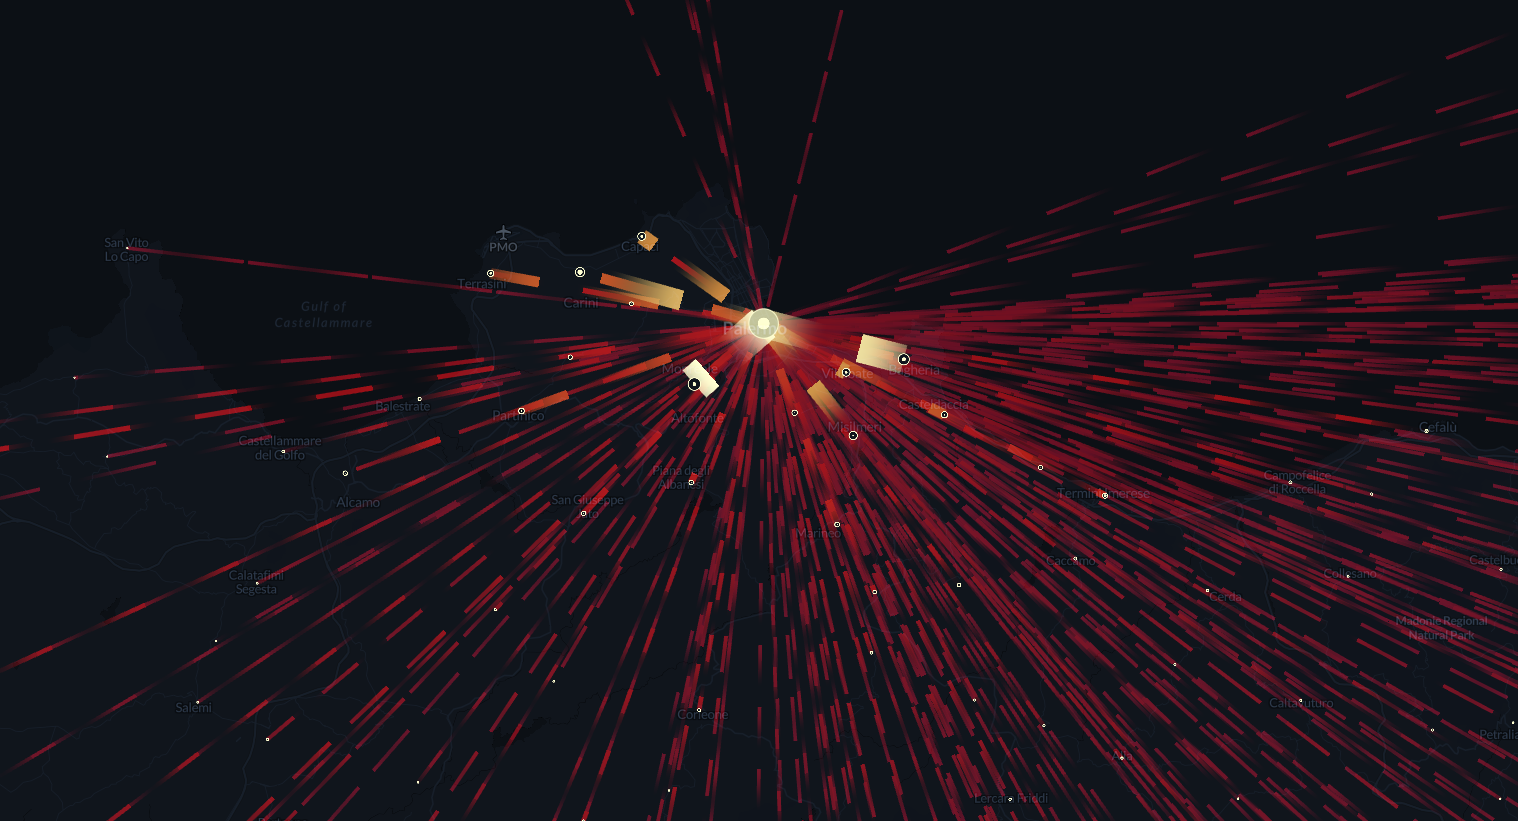

### The Vélib API

The Vélib API used in the android application gives more infomation than the one used in the https://www.velib-metropole.fr/map , because it gives the id of every bike (bikeName in the json response).

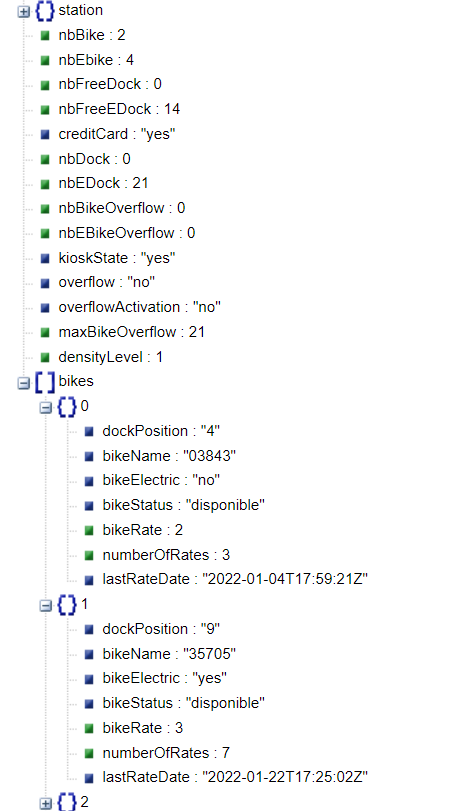

So, by monitoring and saving these data every 10 min we can know that a bike moved from a station to another

### Example :

#### At 7:00 PM :

The bike 03843 appears as available in the station : "Jourdan - Stade Charléty"

#### At 07:10 PM :

The same bike 03843 doesn't appear in any station of the Vélib stations, it has been probably taken by a user to make a ride

#### At 07:20 PM :

The same bike still doesn't appear, It is still used by its rider.

#### At 07:30 PM :

The bike 03843 appears among the bikes parked in the station : "Saint-Sulpice"

#### Conclusion :

Only by saving every 10 minutes the data about the bikes parked in every station, we were able to know that the bike 03843 moved from station "Jourdan - Stade Charléty" to station "Saint-Sulpice"

## How to collect the data ?

The code of the data collection will be put here later

### We merge the data in one single file

In [170]:
import csv
import os
path = "dataflow/"
dir_list = os.listdir(path)
with open('dataflow/dataflow.csv', 'w', newline='') as newCsvFile:
    csvWriter = csv.writer(newCsvFile, delimiter=';',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    row = ["date", "stationCode", "bikeName"]
    csvWriter.writerow(row)
    for thisFile in dir_list :
        print(thisFile)
        fileTime = thisFile.split("_")[1] + " " + thisFile.split("_")[2].split(".")[0]
        print(fileTime)
        with open(path+thisFile, newline='') as csvfile:
            csv_reader = csv.reader(csvfile, delimiter=';', quotechar='|')
            next(csv_reader)
            for row in csv_reader:
                row.insert(0,fileTime)
                csvWriter.writerow(row)


realNumbers_23-01-2022_0400.csv
23-01-2022 0400
realNumbers_23-01-2022_0410.csv
23-01-2022 0410
realNumbers_23-01-2022_0420.csv
23-01-2022 0420
realNumbers_23-01-2022_0430.csv
23-01-2022 0430
realNumbers_23-01-2022_0440.csv
23-01-2022 0440
realNumbers_23-01-2022_0450.csv
23-01-2022 0450
realNumbers_23-01-2022_0500.csv
23-01-2022 0500
realNumbers_23-01-2022_0510.csv
23-01-2022 0510
realNumbers_23-01-2022_0520.csv
23-01-2022 0520
realNumbers_23-01-2022_0530.csv
23-01-2022 0530
realNumbers_23-01-2022_0540.csv
23-01-2022 0540
realNumbers_23-01-2022_0550.csv
23-01-2022 0550
realNumbers_23-01-2022_0600.csv
23-01-2022 0600
realNumbers_23-01-2022_0610.csv
23-01-2022 0610
realNumbers_23-01-2022_0620.csv
23-01-2022 0620
realNumbers_23-01-2022_0630.csv
23-01-2022 0630
realNumbers_23-01-2022_0650.csv
23-01-2022 0650
realNumbers_23-01-2022_0710.csv
23-01-2022 0710
realNumbers_23-01-2022_0730.csv
23-01-2022 0730
realNumbers_23-01-2022_0750.csv
23-01-2022 0750


### Reading in the generated file

In [171]:
import pandas as pd
df = pd.read_csv("dataflow2/dataflow.csv", delimiter=";")

In [172]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y %H%M')

In [176]:
df3= df[["date", "stationCode", "bikeName"]].copy(deep=True)
df3["isStatusChanged"] = df.groupby(['bikeName'])["stationCode"].shift(1) != df.groupby(['bikeName'])["stationCode"]

In [177]:
df3

date  stationCode  bikeName  isStatusChanged
0      2022-01-24 04:20:00        11104     44531             True
1      2022-01-24 04:20:00        11104      5490             True
2      2022-01-24 04:20:00        11104     24187             True
3      2022-01-24 04:20:00        11104     15441             True
4      2022-01-24 04:20:00        11104     36431             True
...                    ...          ...       ...              ...
147718 2022-01-24 07:40:00        18024     36345             True
147719 2022-01-24 07:40:00        18024     40717             True
147720 2022-01-24 07:40:00        18024     55436             True
147721 2022-01-24 07:40:00        18024     55500             True
147722 2022-01-24 07:40:00        18024     57832             True

[147723 rows x 4 columns]

### We detect the bikes that have moved from a station to another

In [178]:
listOfMovedBikes = []
for row in df4["bikeName"].iteritems():
    listOfMovedBikes.append(row[1])
    print(row[1])

3626
56179
23916
4931
3626
45590
55827
51340
34053
40102
44883
35649
3626
38896
7980
44
8346
43030
56703
19096
44556
5136
50822
26815
34939
55466
21503
39177
26402
56487
7519
9283
44283
43845
17388
19292
39386
51065
9823
25849
37978
43987
4531
12328
55457
34023
57063
24763
40068
39052
56927
44358
13231
12040
57822
19068
10264
23108
35490
55652
3626
44693
11727
14903
41269
26241
22799
26554
19575
50591
55738
17895
56504
27063
52709
19509
56024
39257
57846
42681
9716
4793
44684
55075
45651
9306
21861
17404
17440
650
23392
17279
34104
56939
31497
5631
52035
35603
51832
18081
38322
35332
23703
34951
35330
57253
1817
56238
3626
17356
35174
44556
44722
40201
3626
34928
51271
57027
58034
35737
37135
18714
19754
3276
18664
44101
57670
58510
51387
16575
27127
25918
11302
7211
39558
45580
45778
42662
36250
19094
56673
23441
7387
50808
45858
34933
35196
37247
11894
38932
25803
37862
3101
19368
26222
56476
3626
57686
4977
55976
34532
55959
57486
38707
11323
55578
45830
3626
53419
35712
43674
57288

In [179]:
listOfMovedBikes

[3626,
 56179,
 23916,
 4931,
 3626,
 45590,
 55827,
 51340,
 34053,
 40102,
 44883,
 35649,
 3626,
 38896,
 7980,
 44,
 8346,
 43030,
 56703,
 19096,
 44556,
 5136,
 50822,
 26815,
 34939,
 55466,
 21503,
 39177,
 26402,
 56487,
 7519,
 9283,
 44283,
 43845,
 17388,
 19292,
 39386,
 51065,
 9823,
 25849,
 37978,
 43987,
 4531,
 12328,
 55457,
 34023,
 57063,
 24763,
 40068,
 39052,
 56927,
 44358,
 13231,
 12040,
 57822,
 19068,
 10264,
 23108,
 35490,
 55652,
 3626,
 44693,
 11727,
 14903,
 41269,
 26241,
 22799,
 26554,
 19575,
 50591,
 55738,
 17895,
 56504,
 27063,
 52709,
 19509,
 56024,
 39257,
 57846,
 42681,
 9716,
 4793,
 44684,
 55075,
 45651,
 9306,
 21861,
 17404,
 17440,
 650,
 23392,
 17279,
 34104,
 56939,
 31497,
 5631,
 52035,
 35603,
 51832,
 18081,
 38322,
 35332,
 23703,
 34951,
 35330,
 57253,
 1817,
 56238,
 3626,
 17356,
 35174,
 44556,
 44722,
 40201,
 3626,
 34928,
 51271,
 57027,
 58034,
 35737,
 37135,
 18714,
 19754,
 3276,
 18664,
 44101,
 57670,
 58510,
 

### List of flows [ [origin, dest], ...]

In [184]:
flows = []
for thisBike in listOfMovedBikes : 
    ok = df.loc[df['bikeName'] == thisBike]
    ok['match'] = ok.stationCode != ok.stationCode.shift()
    only = ok.loc[ok['match'] == True]
    listStops=[]
    for row in only["stationCode"].iteritems():
        listStops.append(row[1])
    for i in range(len(listStops)-1):
        flows.append([listStops[i],listStops[i+1]])
        print(ok)

C:\Users\salah\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\salah\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\salah\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

                      date  stationCode  bikeName  match
4598   2022-01-24 04:20:00        11010      3626   True
12201  2022-01-24 04:20:00        12106      3626   True
17076  2022-01-24 04:40:00        11010      3626   True
24674  2022-01-24 04:40:00        12106      3626   True
29543  2022-01-24 05:00:00        11010      3626   True
37162  2022-01-24 05:00:00        12106      3626   True
42040  2022-01-24 05:20:00        11010      3626   True
49641  2022-01-24 05:20:00        12106      3626   True
54513  2022-01-24 05:40:00        11010      3626   True
62108  2022-01-24 05:40:00        12106      3626   True
66971  2022-01-24 06:00:00        11010      3626   True
74545  2022-01-24 06:00:00        12106      3626   True
79462  2022-01-24 06:20:00        11010      3626   True
91051  2022-01-24 06:28:00        11010      3626  False
98597  2022-01-24 06:28:00        12106      3626   True
103497 2022-01-24 06:40:00        11010      3626   True
111024 2022-01-24 06:40:00     

C:\Users\salah\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\salah\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\salah\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

                      date  stationCode  bikeName  match
72759  2022-01-24 06:00:00         6026     24763   True
85220  2022-01-24 06:20:00         6026     24763  False
106469 2022-01-24 06:40:00        15030     24763   True
118866 2022-01-24 07:00:00        15030     24763  False
131136 2022-01-24 07:20:00        15030     24763  False
143162 2022-01-24 07:40:00        15030     24763  False
                      date  stationCode  bikeName  match
4598   2022-01-24 04:20:00        11010      3626   True
12201  2022-01-24 04:20:00        12106      3626   True
17076  2022-01-24 04:40:00        11010      3626   True
24674  2022-01-24 04:40:00        12106      3626   True
29543  2022-01-24 05:00:00        11010      3626   True
37162  2022-01-24 05:00:00        12106      3626   True
42040  2022-01-24 05:20:00        11010      3626   True
49641  2022-01-24 05:20:00        12106      3626   True
54513  2022-01-24 05:40:00        11010      3626   True
62108  2022-01-24 05:40:00     

C:\Users\salah\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\salah\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\salah\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

                      date  stationCode  bikeName  match
4598   2022-01-24 04:20:00        11010      3626   True
12201  2022-01-24 04:20:00        12106      3626   True
17076  2022-01-24 04:40:00        11010      3626   True
24674  2022-01-24 04:40:00        12106      3626   True
29543  2022-01-24 05:00:00        11010      3626   True
37162  2022-01-24 05:00:00        12106      3626   True
42040  2022-01-24 05:20:00        11010      3626   True
49641  2022-01-24 05:20:00        12106      3626   True
54513  2022-01-24 05:40:00        11010      3626   True
62108  2022-01-24 05:40:00        12106      3626   True
66971  2022-01-24 06:00:00        11010      3626   True
74545  2022-01-24 06:00:00        12106      3626   True
79462  2022-01-24 06:20:00        11010      3626   True
91051  2022-01-24 06:28:00        11010      3626  False
98597  2022-01-24 06:28:00        12106      3626   True
103497 2022-01-24 06:40:00        11010      3626   True
111024 2022-01-24 06:40:00     

C:\Users\salah\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\salah\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\salah\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

                      date  stationCode  bikeName  match
4819   2022-01-24 04:20:00        18017     23377   True
17298  2022-01-24 04:40:00        18017     23377  False
29764  2022-01-24 05:00:00        18017     23377  False
42244  2022-01-24 05:20:00        18017     23377  False
54732  2022-01-24 05:40:00        18017     23377  False
67192  2022-01-24 06:00:00        18017     23377  False
79668  2022-01-24 06:20:00        18017     23377  False
91258  2022-01-24 06:28:00        18017     23377  False
103704 2022-01-24 06:40:00        18017     23377  False
126512 2022-01-24 07:20:00        23001     23377   True
138658 2022-01-24 07:40:00        23001     23377  False
                      date  stationCode  bikeName  match
4598   2022-01-24 04:20:00        11010      3626   True
12201  2022-01-24 04:20:00        12106      3626   True
17076  2022-01-24 04:40:00        11010      3626   True
24674  2022-01-24 04:40:00        12106      3626   True
29543  2022-01-24 05:00:00     

C:\Users\salah\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\salah\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\salah\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

                      date  stationCode  bikeName  match
8205   2022-01-24 04:20:00        12005     31609   True
20683  2022-01-24 04:40:00        12005     31609  False
33176  2022-01-24 05:00:00        12005     31609  False
45654  2022-01-24 05:20:00        12005     31609  False
58127  2022-01-24 05:40:00        12005     31609  False
70604  2022-01-24 06:00:00        12005     31609  False
83074  2022-01-24 06:20:00        12005     31609  False
94665  2022-01-24 06:28:00        12005     31609  False
107106 2022-01-24 06:40:00        12005     31609  False
120667 2022-01-24 07:00:00         3010     31609   True
132911 2022-01-24 07:20:00         3010     31609  False
144844 2022-01-24 07:40:00         3010     31609  False
                      date  stationCode  bikeName  match
2780   2022-01-24 04:20:00        33018     35944   True
15258  2022-01-24 04:40:00        33018     35944  False
27725  2022-01-24 05:00:00        33018     35944  False
40218  2022-01-24 05:20:00     

C:\Users\salah\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\salah\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\salah\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

                      date  stationCode  bikeName  match
10084  2022-01-24 04:20:00        19130     39333   True
22559  2022-01-24 04:40:00        19130     39333  False
35049  2022-01-24 05:00:00        19130     39333  False
47524  2022-01-24 05:20:00        19130     39333  False
59995  2022-01-24 05:40:00        19130     39333  False
72466  2022-01-24 06:00:00        19130     39333  False
84931  2022-01-24 06:20:00        19130     39333  False
96521  2022-01-24 06:28:00        19130     39333  False
108956 2022-01-24 06:40:00        19130     39333  False
121356 2022-01-24 07:00:00        19130     39333  False
139308 2022-01-24 07:40:00        20136     39333   True
                      date  stationCode  bikeName  match
12021  2022-01-24 04:20:00        21112     38581   True
24495  2022-01-24 04:40:00        21112     38581  False
36982  2022-01-24 05:00:00        21112     38581  False
49457  2022-01-24 05:20:00        21112     38581  False
61919  2022-01-24 05:40:00     

C:\Users\salah\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\salah\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\salah\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

                      date  stationCode  bikeName  match
4598   2022-01-24 04:20:00        11010      3626   True
12201  2022-01-24 04:20:00        12106      3626   True
17076  2022-01-24 04:40:00        11010      3626   True
24674  2022-01-24 04:40:00        12106      3626   True
29543  2022-01-24 05:00:00        11010      3626   True
37162  2022-01-24 05:00:00        12106      3626   True
42040  2022-01-24 05:20:00        11010      3626   True
49641  2022-01-24 05:20:00        12106      3626   True
54513  2022-01-24 05:40:00        11010      3626   True
62108  2022-01-24 05:40:00        12106      3626   True
66971  2022-01-24 06:00:00        11010      3626   True
74545  2022-01-24 06:00:00        12106      3626   True
79462  2022-01-24 06:20:00        11010      3626   True
91051  2022-01-24 06:28:00        11010      3626  False
98597  2022-01-24 06:28:00        12106      3626   True
103497 2022-01-24 06:40:00        11010      3626   True
111024 2022-01-24 06:40:00     

C:\Users\salah\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\salah\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\salah\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

                      date  stationCode  bikeName  match
4598   2022-01-24 04:20:00        11010      3626   True
12201  2022-01-24 04:20:00        12106      3626   True
17076  2022-01-24 04:40:00        11010      3626   True
24674  2022-01-24 04:40:00        12106      3626   True
29543  2022-01-24 05:00:00        11010      3626   True
37162  2022-01-24 05:00:00        12106      3626   True
42040  2022-01-24 05:20:00        11010      3626   True
49641  2022-01-24 05:20:00        12106      3626   True
54513  2022-01-24 05:40:00        11010      3626   True
62108  2022-01-24 05:40:00        12106      3626   True
66971  2022-01-24 06:00:00        11010      3626   True
74545  2022-01-24 06:00:00        12106      3626   True
79462  2022-01-24 06:20:00        11010      3626   True
91051  2022-01-24 06:28:00        11010      3626  False
98597  2022-01-24 06:28:00        12106      3626   True
103497 2022-01-24 06:40:00        11010      3626   True
111024 2022-01-24 06:40:00     

C:\Users\salah\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\salah\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\salah\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

                      date  stationCode  bikeName  match
4598   2022-01-24 04:20:00        11010      3626   True
12201  2022-01-24 04:20:00        12106      3626   True
17076  2022-01-24 04:40:00        11010      3626   True
24674  2022-01-24 04:40:00        12106      3626   True
29543  2022-01-24 05:00:00        11010      3626   True
37162  2022-01-24 05:00:00        12106      3626   True
42040  2022-01-24 05:20:00        11010      3626   True
49641  2022-01-24 05:20:00        12106      3626   True
54513  2022-01-24 05:40:00        11010      3626   True
62108  2022-01-24 05:40:00        12106      3626   True
66971  2022-01-24 06:00:00        11010      3626   True
74545  2022-01-24 06:00:00        12106      3626   True
79462  2022-01-24 06:20:00        11010      3626   True
91051  2022-01-24 06:28:00        11010      3626  False
98597  2022-01-24 06:28:00        12106      3626   True
103497 2022-01-24 06:40:00        11010      3626   True
111024 2022-01-24 06:40:00     

C:\Users\salah\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\salah\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\salah\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

                      date  stationCode  bikeName  match
4598   2022-01-24 04:20:00        11010      3626   True
12201  2022-01-24 04:20:00        12106      3626   True
17076  2022-01-24 04:40:00        11010      3626   True
24674  2022-01-24 04:40:00        12106      3626   True
29543  2022-01-24 05:00:00        11010      3626   True
37162  2022-01-24 05:00:00        12106      3626   True
42040  2022-01-24 05:20:00        11010      3626   True
49641  2022-01-24 05:20:00        12106      3626   True
54513  2022-01-24 05:40:00        11010      3626   True
62108  2022-01-24 05:40:00        12106      3626   True
66971  2022-01-24 06:00:00        11010      3626   True
74545  2022-01-24 06:00:00        12106      3626   True
79462  2022-01-24 06:20:00        11010      3626   True
91051  2022-01-24 06:28:00        11010      3626  False
98597  2022-01-24 06:28:00        12106      3626   True
103497 2022-01-24 06:40:00        11010      3626   True
111024 2022-01-24 06:40:00     

C:\Users\salah\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\salah\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\salah\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

                      date  stationCode  bikeName  match
4598   2022-01-24 04:20:00        11010      3626   True
12201  2022-01-24 04:20:00        12106      3626   True
17076  2022-01-24 04:40:00        11010      3626   True
24674  2022-01-24 04:40:00        12106      3626   True
29543  2022-01-24 05:00:00        11010      3626   True
37162  2022-01-24 05:00:00        12106      3626   True
42040  2022-01-24 05:20:00        11010      3626   True
49641  2022-01-24 05:20:00        12106      3626   True
54513  2022-01-24 05:40:00        11010      3626   True
62108  2022-01-24 05:40:00        12106      3626   True
66971  2022-01-24 06:00:00        11010      3626   True
74545  2022-01-24 06:00:00        12106      3626   True
79462  2022-01-24 06:20:00        11010      3626   True
91051  2022-01-24 06:28:00        11010      3626  False
98597  2022-01-24 06:28:00        12106      3626   True
103497 2022-01-24 06:40:00        11010      3626   True
111024 2022-01-24 06:40:00     

C:\Users\salah\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\salah\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\salah\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

                      date  stationCode  bikeName  match
4598   2022-01-24 04:20:00        11010      3626   True
12201  2022-01-24 04:20:00        12106      3626   True
17076  2022-01-24 04:40:00        11010      3626   True
24674  2022-01-24 04:40:00        12106      3626   True
29543  2022-01-24 05:00:00        11010      3626   True
37162  2022-01-24 05:00:00        12106      3626   True
42040  2022-01-24 05:20:00        11010      3626   True
49641  2022-01-24 05:20:00        12106      3626   True
54513  2022-01-24 05:40:00        11010      3626   True
62108  2022-01-24 05:40:00        12106      3626   True
66971  2022-01-24 06:00:00        11010      3626   True
74545  2022-01-24 06:00:00        12106      3626   True
79462  2022-01-24 06:20:00        11010      3626   True
91051  2022-01-24 06:28:00        11010      3626  False
98597  2022-01-24 06:28:00        12106      3626   True
103497 2022-01-24 06:40:00        11010      3626   True
111024 2022-01-24 06:40:00     

C:\Users\salah\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\salah\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\salah\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

                      date  stationCode  bikeName  match
4598   2022-01-24 04:20:00        11010      3626   True
12201  2022-01-24 04:20:00        12106      3626   True
17076  2022-01-24 04:40:00        11010      3626   True
24674  2022-01-24 04:40:00        12106      3626   True
29543  2022-01-24 05:00:00        11010      3626   True
37162  2022-01-24 05:00:00        12106      3626   True
42040  2022-01-24 05:20:00        11010      3626   True
49641  2022-01-24 05:20:00        12106      3626   True
54513  2022-01-24 05:40:00        11010      3626   True
62108  2022-01-24 05:40:00        12106      3626   True
66971  2022-01-24 06:00:00        11010      3626   True
74545  2022-01-24 06:00:00        12106      3626   True
79462  2022-01-24 06:20:00        11010      3626   True
91051  2022-01-24 06:28:00        11010      3626  False
98597  2022-01-24 06:28:00        12106      3626   True
103497 2022-01-24 06:40:00        11010      3626   True
111024 2022-01-24 06:40:00     

C:\Users\salah\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\salah\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\salah\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

C:\Users\salah\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\salah\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\salah\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

                      date  stationCode  bikeName  match
4598   2022-01-24 04:20:00        11010      3626   True
12201  2022-01-24 04:20:00        12106      3626   True
17076  2022-01-24 04:40:00        11010      3626   True
24674  2022-01-24 04:40:00        12106      3626   True
29543  2022-01-24 05:00:00        11010      3626   True
37162  2022-01-24 05:00:00        12106      3626   True
42040  2022-01-24 05:20:00        11010      3626   True
49641  2022-01-24 05:20:00        12106      3626   True
54513  2022-01-24 05:40:00        11010      3626   True
62108  2022-01-24 05:40:00        12106      3626   True
66971  2022-01-24 06:00:00        11010      3626   True
74545  2022-01-24 06:00:00        12106      3626   True
79462  2022-01-24 06:20:00        11010      3626   True
91051  2022-01-24 06:28:00        11010      3626  False
98597  2022-01-24 06:28:00        12106      3626   True
103497 2022-01-24 06:40:00        11010      3626   True
111024 2022-01-24 06:40:00     

C:\Users\salah\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\salah\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\salah\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

                      date  stationCode  bikeName  match
4598   2022-01-24 04:20:00        11010      3626   True
12201  2022-01-24 04:20:00        12106      3626   True
17076  2022-01-24 04:40:00        11010      3626   True
24674  2022-01-24 04:40:00        12106      3626   True
29543  2022-01-24 05:00:00        11010      3626   True
37162  2022-01-24 05:00:00        12106      3626   True
42040  2022-01-24 05:20:00        11010      3626   True
49641  2022-01-24 05:20:00        12106      3626   True
54513  2022-01-24 05:40:00        11010      3626   True
62108  2022-01-24 05:40:00        12106      3626   True
66971  2022-01-24 06:00:00        11010      3626   True
74545  2022-01-24 06:00:00        12106      3626   True
79462  2022-01-24 06:20:00        11010      3626   True
91051  2022-01-24 06:28:00        11010      3626  False
98597  2022-01-24 06:28:00        12106      3626   True
103497 2022-01-24 06:40:00        11010      3626   True
111024 2022-01-24 06:40:00     

                      date  stationCode  bikeName  match
10581  2022-01-24 04:20:00        32020     34089   True
23057  2022-01-24 04:40:00        32020     34089  False
35546  2022-01-24 05:00:00        32020     34089  False
48022  2022-01-24 05:20:00        32020     34089  False
60489  2022-01-24 05:40:00        32020     34089  False
72961  2022-01-24 06:00:00        32020     34089  False
85423  2022-01-24 06:20:00        32020     34089  False
97010  2022-01-24 06:28:00        32020     34089  False
109446 2022-01-24 06:40:00        32020     34089  False
127926 2022-01-24 07:20:00        32017     34089   True
140013 2022-01-24 07:40:00        32017     34089  False


C:\Users\salah\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\salah\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\salah\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [185]:
flows

[[11010, 12106],
 [12106, 11010],
 [11010, 12106],
 [12106, 11010],
 [11010, 12106],
 [12106, 11010],
 [11010, 12106],
 [12106, 11010],
 [11010, 12106],
 [12106, 11010],
 [11010, 12106],
 [12106, 11010],
 [11010, 12106],
 [12106, 11010],
 [11010, 12106],
 [12106, 11010],
 [11010, 12106],
 [12106, 11010],
 [11010, 12106],
 [12106, 11010],
 [11010, 12106],
 [11010, 12106],
 [12106, 11010],
 [11010, 12106],
 [12106, 11010],
 [11010, 12106],
 [12106, 11010],
 [11010, 12106],
 [12106, 11010],
 [11010, 12106],
 [12106, 11010],
 [11010, 12106],
 [12106, 11010],
 [11010, 12106],
 [12106, 11010],
 [11010, 12106],
 [12106, 11010],
 [11010, 12106],
 [12106, 11010],
 [11010, 12106],
 [12106, 11010],
 [11010, 12106],
 [20136, 19119],
 [11010, 12106],
 [12106, 11010],
 [11010, 12106],
 [12106, 11010],
 [11010, 12106],
 [12106, 11010],
 [11010, 12106],
 [12106, 11010],
 [11010, 12106],
 [12106, 11010],
 [11010, 12106],
 [12106, 11010],
 [11010, 12106],
 [12106, 11010],
 [11010, 12106],
 [12106, 11010

### Writing the flows in a csv file

In [187]:
import csv
import os
path = "dataflow/"
dir_list = os.listdir(path)
with open('dataflow/allFlows.csv', 'w', newline='') as newCsvFile:
    csvWriter = csv.writer(newCsvFile, delimiter=';',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    row = ["origin", "dest"]
    csvWriter.writerow(row)
    for thisFlow in flows :
        csvWriter.writerow(thisFlow)


### Using https://flowmap.blue/ to visualise the flows

the method will be put here later

### The result

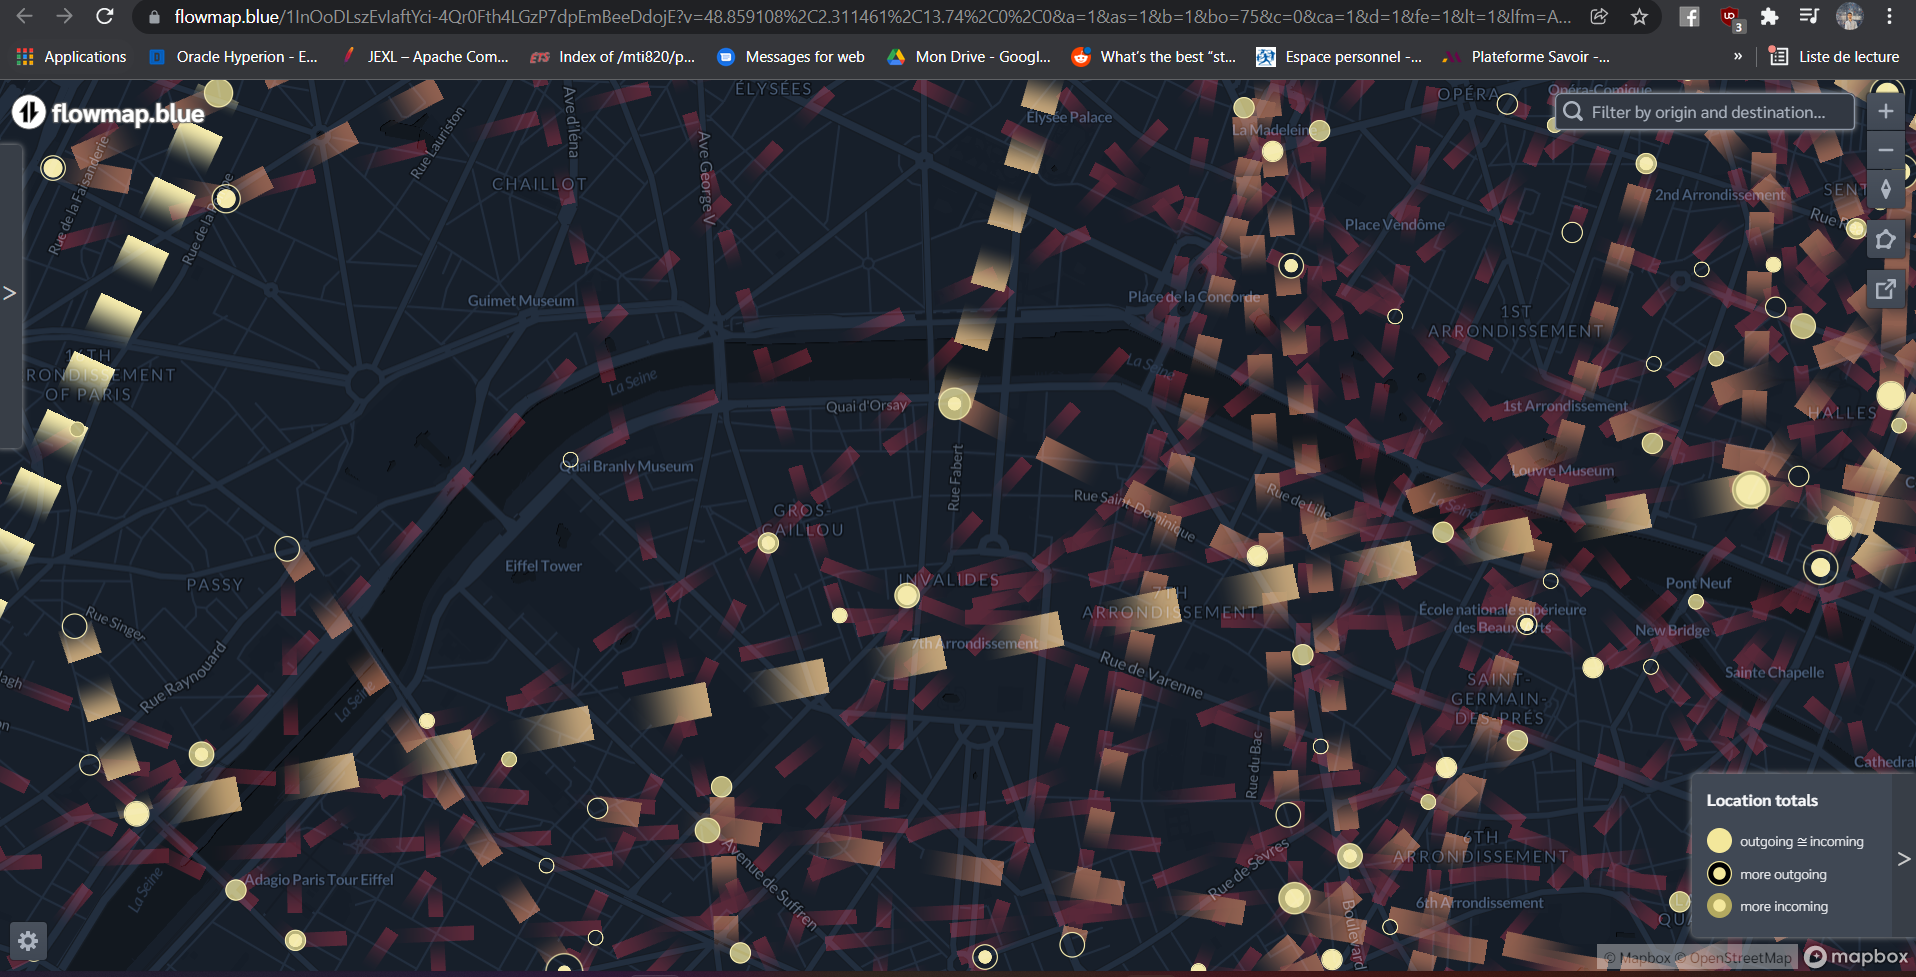